<a href="https://colab.research.google.com/github/FaithOsamaye/House-Price-Advanced-Regression/blob/main/House_Prices_Advanced_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
train_data= pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


<Axes: >

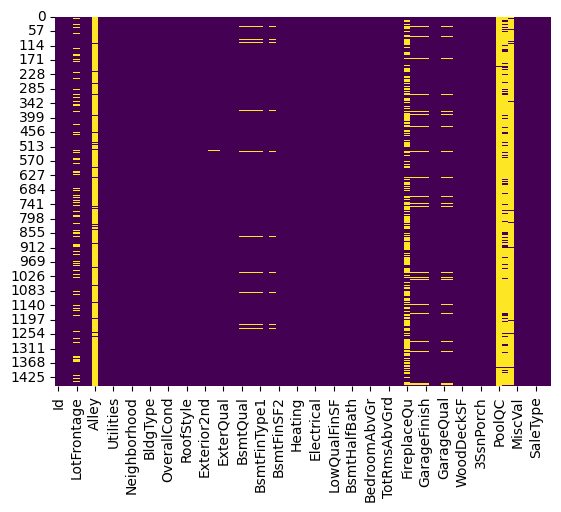

In [ ]:
sns.heatmap(train_data.isnull(),cmap='viridis',cbar=False)

**Data Encoding**

In [ ]:
train_data_new= train_data[['Street','Utilities','SaleCondition','PavedDrive','GarageArea','BedroomAbvGr','OverallQual', 'SalePrice']]

train_data_new.head(1)

,Street,Utilities,SaleCondition,PavedDrive,GarageArea,BedroomAbvGr,OverallQual,SalePrice
0,Pave,AllPub,Normal,Y,548,3,7,208500


In [ ]:
strt = pd.get_dummies(train_data_new['Street'], drop_first=True)
utl = pd.get_dummies(train_data_new['Utilities'], drop_first=True)
sales = pd.get_dummies(train_data_new['SaleCondition'], drop_first=True)
pave = pd.get_dummies(train_data_new['PavedDrive'], drop_first=True)

In [ ]:
train_data_new = pd.concat([train_data_new, strt,utl,sales,pave],axis=1)
train_data_new.head()

,Street,Utilities,SaleCondition,PavedDrive,GarageArea,BedroomAbvGr,OverallQual,SalePrice,Pave,NoSeWa,AdjLand,Alloca,Family,Normal,Partial,P,Y
0,Pave,AllPub,Normal,Y,548,3,7,208500,1,0,0,0,0,1,0,0,1
1,Pave,AllPub,Normal,Y,460,3,6,181500,1,0,0,0,0,1,0,0,1
2,Pave,AllPub,Normal,Y,608,3,7,223500,1,0,0,0,0,1,0,0,1
3,Pave,AllPub,Abnorml,Y,642,3,7,140000,1,0,0,0,0,0,0,0,1
4,Pave,AllPub,Normal,Y,836,4,8,250000,1,0,0,0,0,1,0,0,1


In [ ]:
train_data_new = train_data_new.drop(['Street','Utilities','SaleCondition','PavedDrive'], axis=1)

**1. Linear Regression**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X=train_data_new.drop('SalePrice', axis=1)
y=train_data_new['SalePrice']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
lin_r2 = round(r2_score(pred,y_test),2)
lin_mse = round(mean_squared_error(pred,y_test),2)
lin_mae= round(mean_absolute_error(pred,y_test),2)

In [ ]:
pd.DataFrame(data={"Model": 'Logistic Regression',"MSE": lin_mse,"MAE": lin_mae,"R2": lin_r2},index=[0])

,Model,MSE,MAE,R2
0,Logistic Regression,1.506470e+09,28331.25,0.63


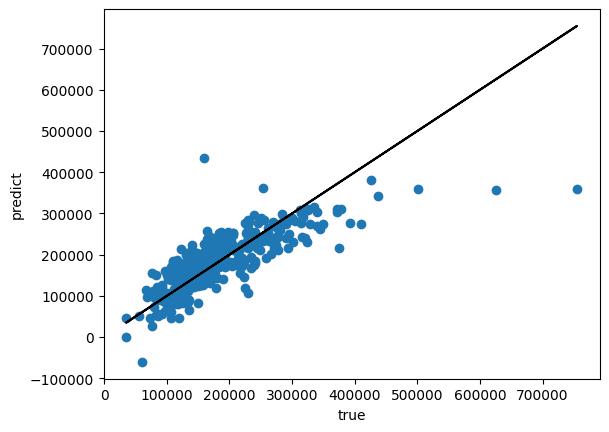

In [ ]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**2. Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [ ]:
X=train_data_new.drop('SalePrice', axis=1)
y=train_data_new['SalePrice']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
las_model = Lasso(alpha=50,max_iter=100,tol=0.1)

las_model.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
las_pred = las_model.predict(X_test)

In [ ]:
las_r2 = r2_score(las_pred,y_test)
las_mse =round(mean_squared_error(las_pred,y_test),2)
las_mae = round(mean_absolute_error(las_pred,y_test),2)

In [ ]:
pd.DataFrame(data={"Model_name": 'LassoRegression',"MSE": las_mse,"MAE": las_mae,"R2": las_r2},index=[0])

,Model_name,MSE,MAE,R2
0,LassoRegression,1.819478e+09,30854.26,0.592402


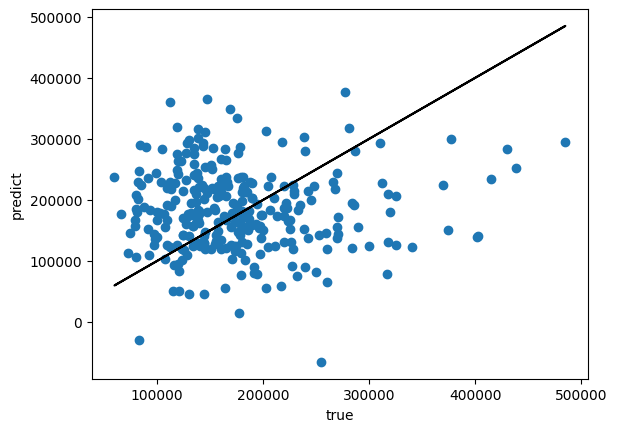

In [ ]:
plt.scatter(x=y_test, y=las_pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**3. Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
X=train_data_new.drop('SalePrice', axis=1)
y=train_data_new['SalePrice']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
rid = Ridge(alpha=1.0)

rid.fit(X_train,y_train)

Ridge()

In [ ]:
rid_pred = rid.predict(X_test)

In [ ]:
print('The r2 score is:', round(r2_score(rid_pred,y_test),2))
print('The mean squared error is:', round(mean_squared_error(rid_pred,y_test),2))
print('The mean absolute error is:', round(mean_absolute_error(rid_pred,y_test),2))

The r2 score is: 0.51
The mean squared error is: 2083424425.27
The mean absolute error is: 30962.59


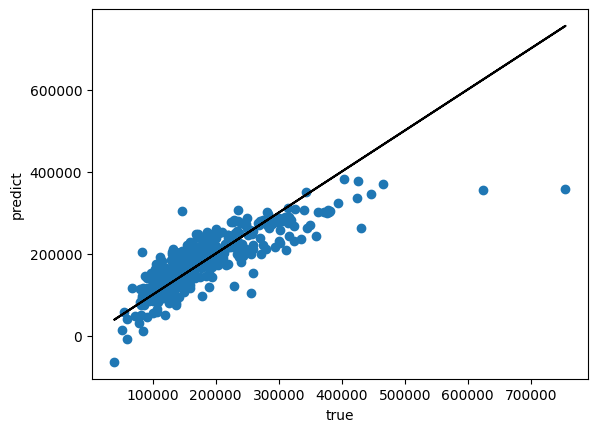

In [ ]:
plt.scatter(x=y_test, y=rid_pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**4. Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X=train_data_new.drop('SalePrice', axis=1)
y=train_data_new['SalePrice']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)

#Featuretransformation
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
#Train the polynomial regression

poly_model = LinearRegression()

poly_model.fit(X_train_trans, y_train)

LinearRegression()

In [ ]:
poly_pred = poly_model.predict(X_test_trans)

In [ ]:
print('The r2 score is:', round(r2_score(poly_pred,y_test),2))
print('The mean squared error is:', round(mean_squared_error(poly_pred,y_test),2))
print('The mean absolute error is:', round(mean_absolute_error(poly_pred,y_test),2))

The r2 score is: 0.68
The mean squared error is: 1373190519.53
The mean absolute error is: 26264.47


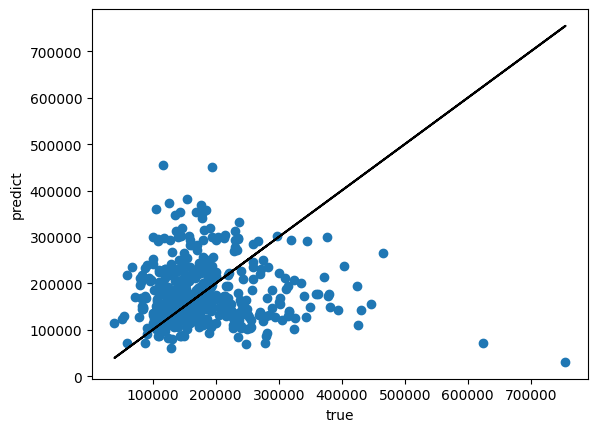

In [ ]:
plt.scatter(x=y_test, y=poly_pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**Testing it out on our test data.**

**Polynomial model prediction**

In [ ]:
poly_pred = poly_pred[:test_data.shape[0]]
test_data['SalePrice'] = poly_pred

In [ ]:
test_data_new = test_data[['Id', 'SalePrice']]
test_data_new.head()

,Id,SalePrice
0,1461,87524.494594
1,1462,348920.734675
2,1463,196562.546960
3,1464,146706.955811
4,1465,222864.848243


**2. Linear Regression model prediction**

In [ ]:
test_data = test_data.iloc[:pred.shape[0]].copy()
test_data['SalePrice'] = pred

In [ ]:
test_data = test_data[['Id', 'SalePrice']]
test_data.head()

,Id,SalePrice
0,1461,128463.626203
1,1462,205436.241052
2,1463,174572.737084
3,1464,131852.496845
4,1465,114304.990551


In [ ]:
test_data.to_csv('test_data_submission.csv', index=False)
from google.colab import files

files.download('test_data_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>